In [1]:

import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
sns.set()

from pylab import rcParams
from pandas import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error
from sklearn import metrics
import statsmodels.tsa.holtwinters as ets
import statsmodels.tools.eval_measures as fa
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<ipython-input-1-35fd721fb2f4>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
from pandas  import  Grouper, concat
import calendar

import warnings
warnings.filterwarnings("ignore")

In [3]:
rose = pd.read_csv('Rose.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

In [4]:
rose.head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

In [5]:
rose.tail()

YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64

In [6]:
print(rose.isnull().sum())
print('The datetime stamps for which the Time Series Data in Rose is not present:')
nan_list = list(rose[rose.isnull() == True].index)
rose[rose.isnull() == True]

2
The datetime stamps for which the Time Series Data in Rose is not present:


YearMonth
1994-07-01   NaN
1994-08-01   NaN
Name: Rose, dtype: float64

Monthly Sales Data of Rose Wines:


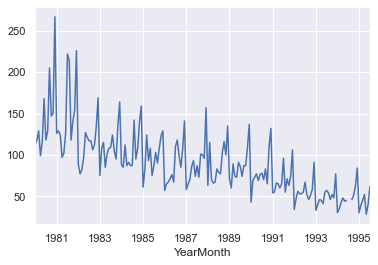

In [7]:
print('Monthly Sales Data of Rose Wines:')
rose.plot();

In [8]:
rose.isnull().sum()

2

In [9]:
rose = rose.interpolate(method = 'polynomial', order = 2)
rose[rose.index.isin(nan_list) == True]

YearMonth
1994-07-01    45.364189
1994-08-01    44.279246
Name: Rose, dtype: float64

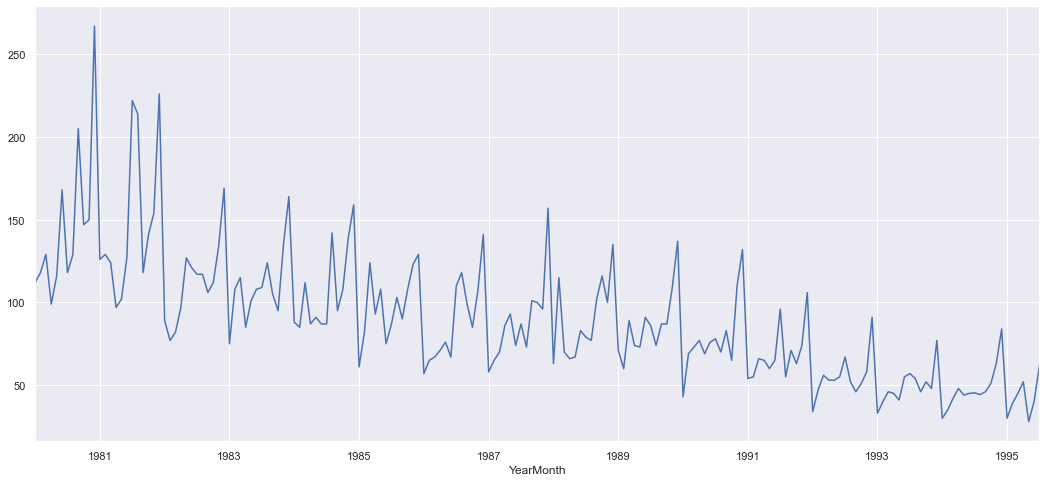

In [10]:
fig,ax=plt.subplots(figsize=(18,8))
rose.plot();

In [11]:
rose.describe()

count    187.000000
mean      89.907184
std       39.246679
min       28.000000
25%       62.500000
50%       85.000000
75%      111.000000
max      267.000000
Name: Rose, dtype: float64

Text(0, 0.5, 'Yearly Rose Wine Sale')

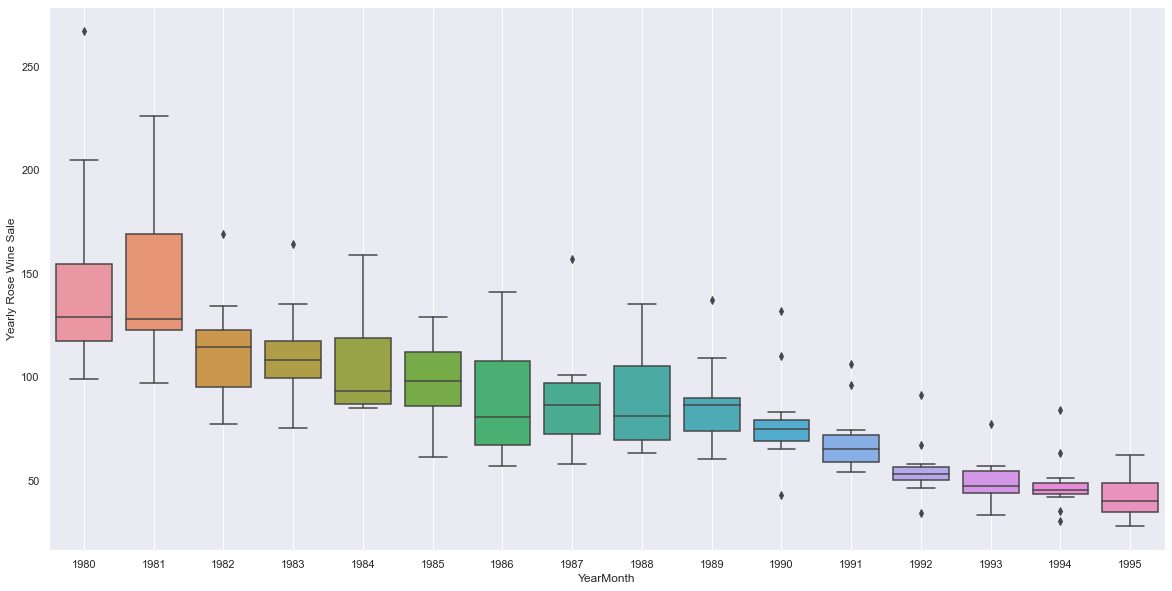

In [12]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(x = rose.index.year,y = rose)
plt.grid();
plt.ylabel('Yearly Rose Wine Sale')

Text(0, 0.5, 'Monthly Rose Wine Sale')

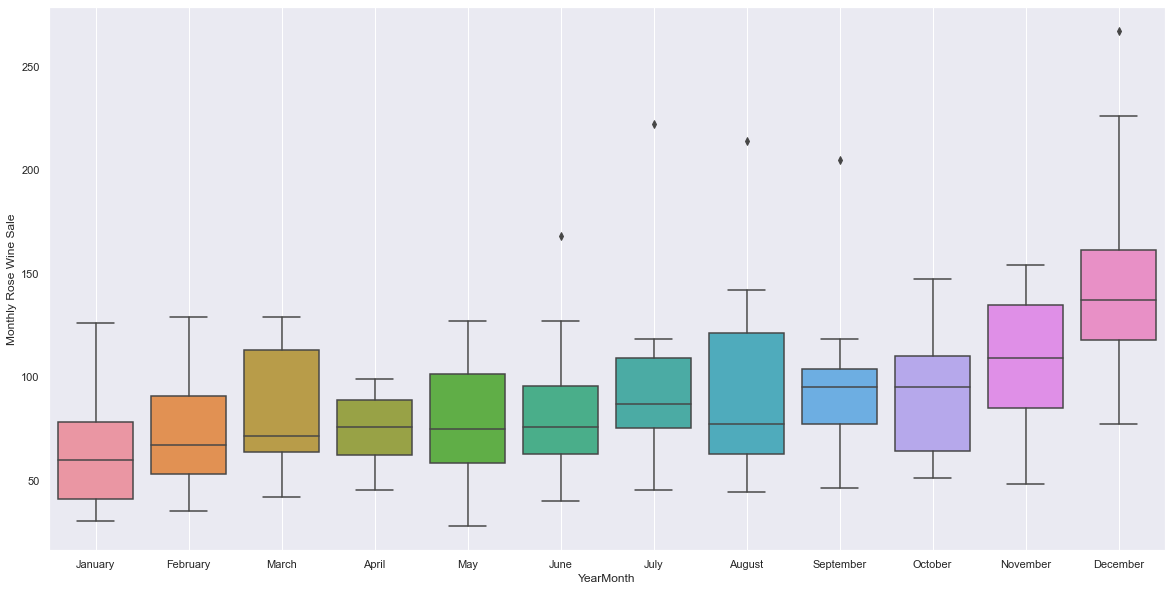

In [13]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(x=rose.index.month_name(),y=rose)
plt.grid();
plt.ylabel('Monthly Rose Wine Sale')

In [14]:
Monthly_Rose_Sales = pd.pivot_table(pd.DataFrame(rose),columns = rose.index.month,index=rose.index.year)
Monthly_Rose_Sales

Rose                                                            \
YearMonth     1      2      3     4      5      6           7           8    
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.364189   44.279246   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

                                       
YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

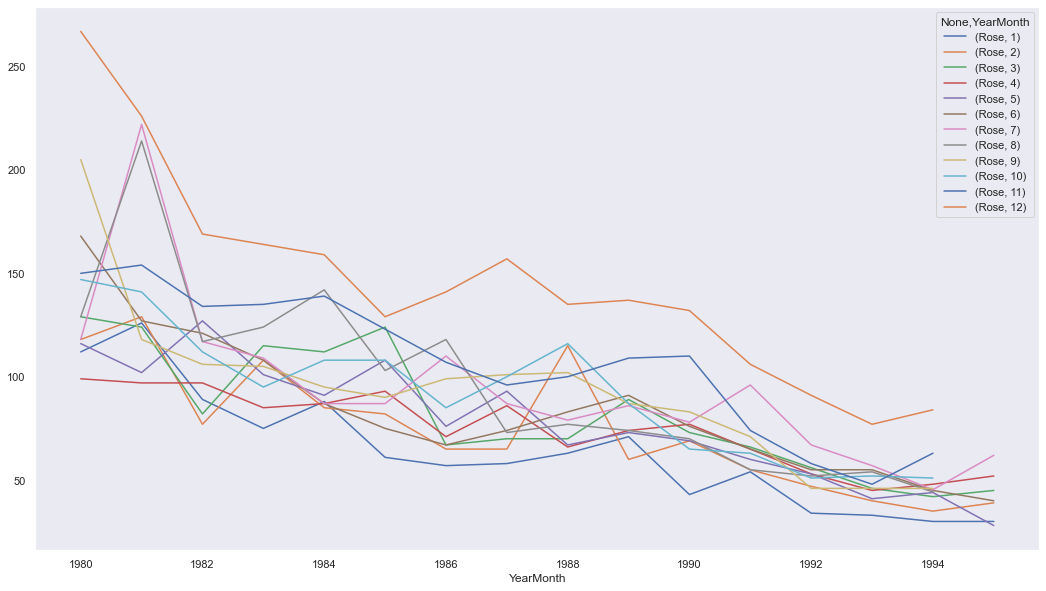

In [15]:
fig,ax=plt.subplots(figsize=(18,10))
Monthly_Rose_Sales.plot(ax=ax)
plt.grid()

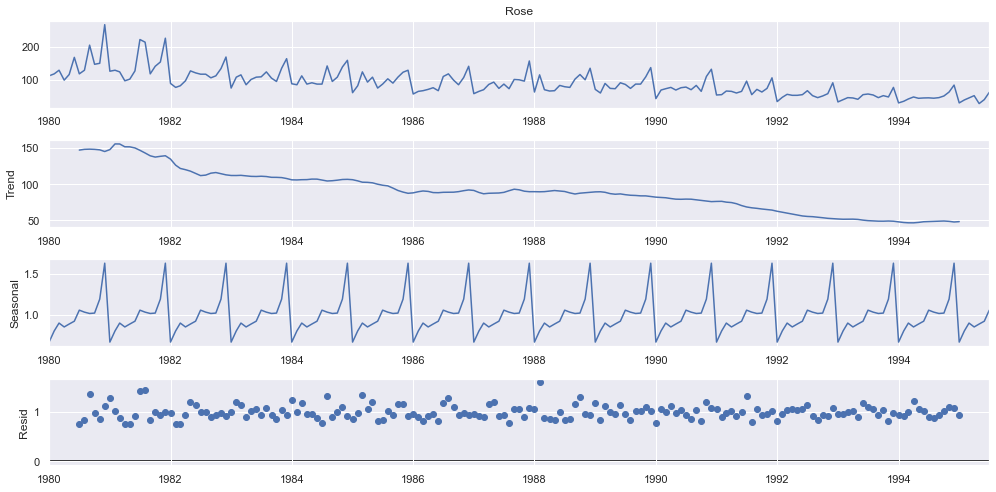

In [16]:
rcParams['figure.figsize'] = 14, 7
decomposition_mul=seasonal_decompose(rose,model='multiplicative')
decomposition_mul.plot();

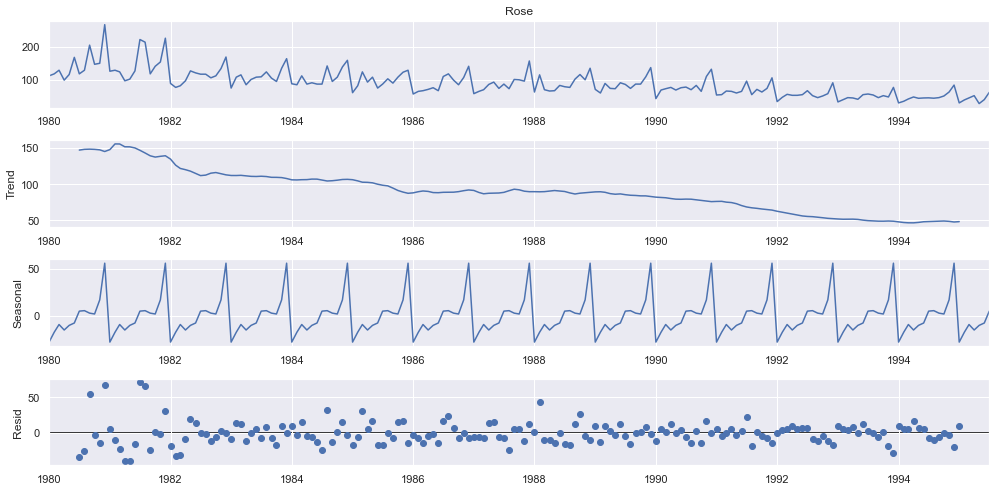

In [17]:
rcParams['figure.figsize'] = 14, 7
decomposition_add=seasonal_decompose(rose,model='additive')
decomposition_add.plot();

In [18]:
# TRAIN TEST SPLIT
#test data selected starting from 1991

In [19]:
train_rose = rose[rose.index.year < 1991]
test_rose = rose[rose.index.year > 1990]

In [20]:
print('Length of the Train Data :',len(train_rose))
print('Length of the Train Data :',len(test_rose))

Length of the Train Data : 132
Length of the Train Data : 55


In [21]:
print('First few rows of the Train Data:','\n',train_rose.head())
print('Last few rows of the Train Data:','\n',train_rose.tail())
print('First few rows of the Test Data:','\n',test_rose.head())
print('Last few rows of the Test Data:','\n',test_rose.tail())

First few rows of the Train Data: 
 YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64
Last few rows of the Train Data: 
 YearMonth
1990-08-01     70.0
1990-09-01     83.0
1990-10-01     65.0
1990-11-01    110.0
1990-12-01    132.0
Name: Rose, dtype: float64
First few rows of the Test Data: 
 YearMonth
1991-01-01    54.0
1991-02-01    55.0
1991-03-01    66.0
1991-04-01    65.0
1991-05-01    60.0
Name: Rose, dtype: float64
Last few rows of the Test Data: 
 YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64


Text(0.5, 1.0, 'Rose Train & Test Split')

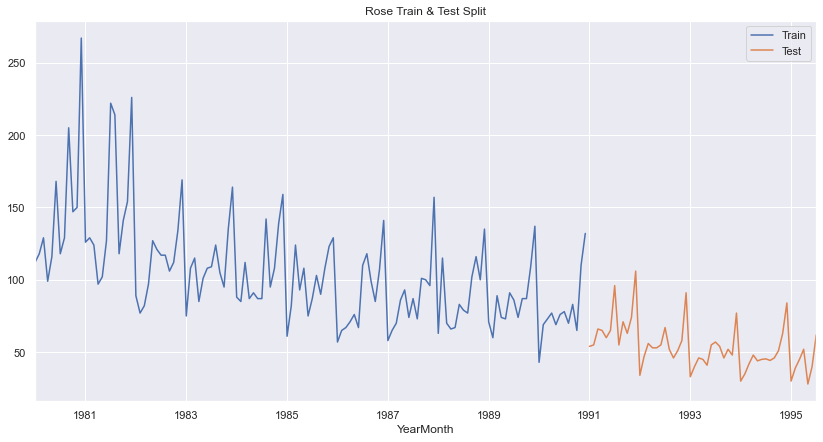

In [22]:
train_rose.plot(label='Train')
test_rose.plot(label='Test')
plt.legend()
plt.title('Rose Train & Test Split')

In [23]:
#MODEL : LINEAR REGRESSION

In [24]:
train_time=[i+1 for i in range (len(train_rose))]
test_time=[i+43 for i in range(len(test_rose))]
print('Rose Wine Training Time Instance','\n',train_time)
print('Rose Wine Test Time Instance','\n',test_time)

Rose Wine Training Time Instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Rose Wine Test Time Instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [25]:
LR_train_rose=train_rose.copy()
LR_test_rose=test_rose.copy()


In [26]:
lr = LinearRegression()
train_time = np.array(train_time).reshape(-1,1)
test_time= np.array(test_time).reshape(-1,1)

In [27]:
LR_train_rose.head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

In [28]:
lr.fit(train_time,LR_train_rose)

LinearRegression()

In [29]:
train_predictions_reg=lr.predict(train_time)
train_predictions_reg = pd.Series(train_predictions_reg, index = train_rose.index)
test_predictions_reg = lr.predict(test_time)
test_predictions_reg = pd.Series(test_predictions_reg, index = test_rose.index)

In [30]:
train_predictions_reg.head()

YearMonth
1980-01-01    137.321144
1980-02-01    136.826766
1980-03-01    136.332388
1980-04-01    135.838010
1980-05-01    135.343632
dtype: float64

In [31]:
test_predictions_reg.head()

YearMonth
1991-01-01    116.557274
1991-02-01    116.062896
1991-03-01    115.568518
1991-04-01    115.074140
1991-05-01    114.579762
dtype: float64

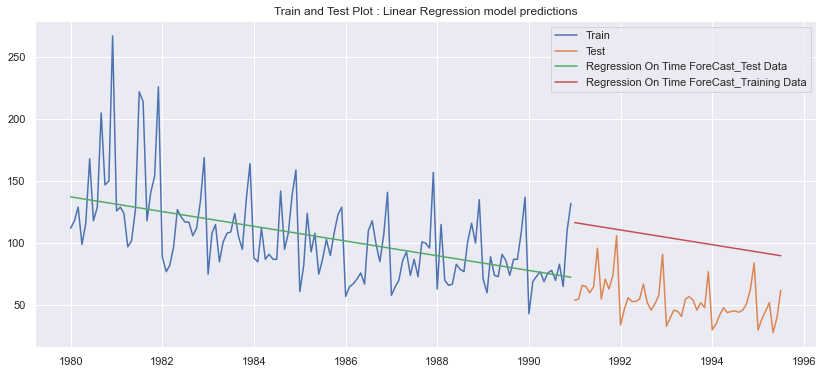

In [32]:
plt.figure(figsize=(14,6))
plt.plot( train_rose, label='Train')
plt.plot(test_rose, label='Test')
plt.plot(train_predictions_reg, label='Regression On Time ForeCast_Test Data')
plt.plot(test_predictions_reg, label='Regression On Time ForeCast_Training Data')
plt.title('Train and Test Plot : Linear Regression model predictions');
plt.legend(loc='best');

In [33]:
rmse_reg = np.sqrt(metrics.mean_squared_error(test_rose,test_predictions_reg))
print('Regression On Time Forecast on the Test Data,RMSE is %3.3F'%(rmse_reg))

Regression On Time Forecast on the Test Data,RMSE is 51.457


In [34]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_reg]},index=['Regression On Time'])
resultsDf.iloc[-1,:]

Test RMSE    51.457439
Name: Regression On Time, dtype: float64

In [35]:
#MODEL 2

In [36]:
NaiveModel_train = pd.Series(train_rose.iloc[-1], index = train_rose.index)
NaiveModel_train.head()

YearMonth
1980-01-01    132.0
1980-02-01    132.0
1980-03-01    132.0
1980-04-01    132.0
1980-05-01    132.0
dtype: float64

In [37]:
NaiveModel_test = pd.Series(train_rose.iloc[-1], index = test_rose.index)
NaiveModel_test.head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
dtype: float64

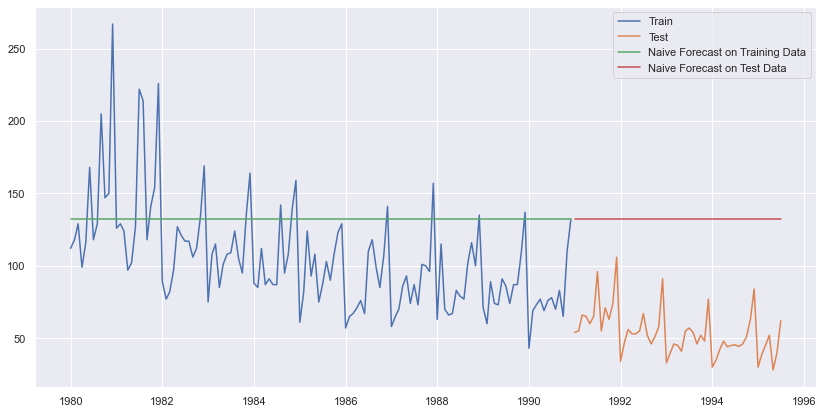

In [38]:
plt.figure(figsize=(14,7))
plt.plot( train_rose, label='Train')
plt.plot(test_rose, label='Test')
plt.plot(NaiveModel_train, label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test, label='Naive Forecast on Test Data')
plt.legend(loc='best')

In [39]:
rmse_naive = np.sqrt(metrics.mean_squared_error(test_rose,NaiveModel_test))
print("For Naive forecast on the Test Data, RMSE is %3.3f " %(rmse_naive))

For Naive forecast on the Test Data, RMSE is 79.746 


In [40]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf.iloc[-1,:]

Test RMSE    79.745697
Name: Naive Model, dtype: float64

In [41]:
#MODEL 3

In [42]:
SimpleAverage_train = pd.Series(train_rose.mean(), index = train_rose.index)
SimpleAverage_train.head()

YearMonth
1980-01-01    104.939394
1980-02-01    104.939394
1980-03-01    104.939394
1980-04-01    104.939394
1980-05-01    104.939394
dtype: float64

In [43]:
SimpleAverage_test = pd.Series(train_rose.mean(), index = test_rose.index)
SimpleAverage_test.head()

YearMonth
1991-01-01    104.939394
1991-02-01    104.939394
1991-03-01    104.939394
1991-04-01    104.939394
1991-05-01    104.939394
dtype: float64

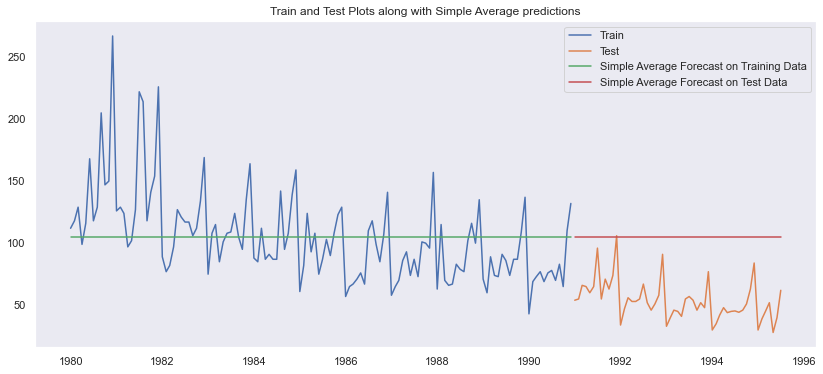

In [44]:
plt.figure(figsize=(14,6))
plt.plot( train_rose, label='Train')
plt.plot(test_rose, label='Test')
plt.plot(SimpleAverage_train, label= 'Simple Average Forecast on Training Data')
plt.plot(SimpleAverage_test, label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Train and Test Plots along with Simple Average predictions")
plt.grid();

In [45]:
rmse_simple_avg = np.sqrt(metrics.mean_squared_error(test_rose, SimpleAverage_test))
print("For Simple Average forecast on the Test Data, RMSE is %3.3f " %(rmse_simple_avg))

For Simple Average forecast on the Test Data, RMSE is 53.488 


In [46]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_simple_avg]}
                           ,index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf.iloc[-1,:]

Test RMSE    53.488233
Name: Simple Average Model, dtype: float64

In [47]:
# MODEL 4
#Simple Exponential Smoothing

In [48]:
from statsmodels.tsa.holtwinters import  SimpleExpSmoothing, Holt, ExponentialSmoothing

In [49]:
SES_train = train_rose.copy()
SES_test = test_rose.copy()
model_SES = SimpleExpSmoothing(SES_train)

In [50]:
#AUTO-FIT

In [51]:
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

{'smoothing_level': 0.09874989825614361,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702255613862,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
SES_train_predict = model_SES_autofit.fittedvalues
SES_train_predict.head()

YearMonth
1980-01-01    134.387023
1980-02-01    132.176306
1980-03-01    130.776398
1980-04-01    130.600978
1980-05-01    127.480385
dtype: float64

In [53]:
SES_test_predict = model_SES_autofit.forecast(steps=len(test_rose))
SES_test_predict.head()

1991-01-01    87.104999
1991-02-01    87.104999
1991-03-01    87.104999
1991-04-01    87.104999
1991-05-01    87.104999
Freq: MS, dtype: float64

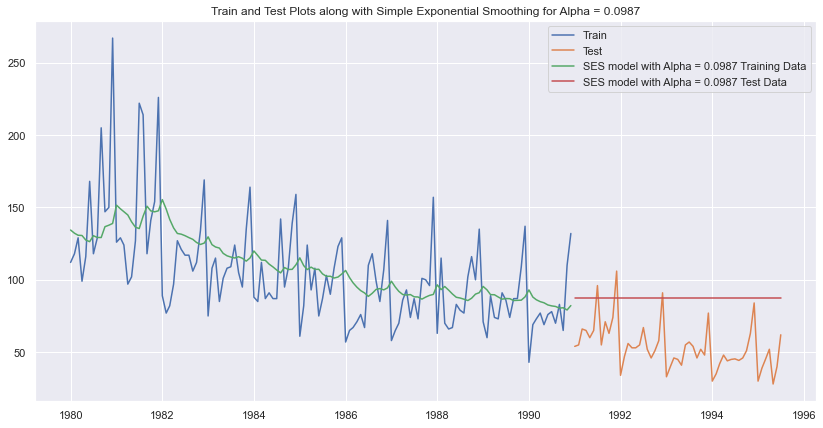

In [54]:
plt.figure(figsize=(14,7))
plt.plot(SES_train, label='Train')
plt.plot(SES_test, label='Test')
plt.plot(SES_train_predict, label='SES model with Alpha = 0.0987 Training Data')
plt.plot(SES_test_predict, label='SES model with Alpha = 0.0987 Test Data')
plt.title('Train and Test Plots along with Simple Exponential Smoothing for Alpha = 0.0987')
plt.legend(loc='best');


In [55]:

rmse_model5_test = np.sqrt(metrics.mean_squared_error(SES_test,SES_test_predict))
print("For Alpha = 0.0987 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model5_test))


For Alpha = 0.0987 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 36.824 


In [56]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]}
                           ,index=['Alpha=0.0987, Simple Exponential Smoothing Optimized'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf.iloc[-1,:]

Test RMSE    36.824478
Name: Alpha=0.0987, Simple Exponential Smoothing Optimized, dtype: float64

In [57]:
#USING DIFFERENT ALPHA VALUES

In [58]:
resultsDf_SES_iter = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
                                
resultsDf_SES_iter

,Alpha Values,Test RMSE


In [59]:
SES_train = pd.DataFrame(SES_train)
SES_test = pd.DataFrame(SES_test)
for i in np.arange(0,1.05,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test_rose))
    

    
    rmse_model5_test_i = np.sqrt(metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i]))
    
    resultsDf_SES_iter = resultsDf_SES_iter.append({'Alpha Values':i, 'Test RMSE':rmse_model5_test_i}, ignore_index=True)
                                                                           

In [60]:
resultsDf_SES_iter.sort_values(by = 'Test RMSE')

,Alpha Values,Test RMSE
2,0.10,36.856268
1,0.05,37.039679
3,0.15,38.750307
4,0.20,41.389972
5,0.25,44.388786
6,0.30,47.532697
7,0.35,50.693433
8,0.40,53.795058
9,0.45,56.794685
10,0.50,59.669244


In [61]:
#MODEL : Double Exponential Smoothing

In [62]:


DES_train = train_rose.copy()
DES_test = test_rose.copy()
DES_train = pd.DataFrame(DES_train)
DES_test = pd.DataFrame(DES_test)

In [63]:
model_DES = Holt(DES_train['Rose'])

In [64]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)
model_DES_autofit.params

{'smoothing_level': 0.0001321339938406504,
 'smoothing_trend': 1.0513882039253742e-16,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 136.22441775313408,
 'initial_trend': -0.4786757879461521,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
DES_train_predict = model_DES_autofit.fittedvalues
DES_train_predict.head()

YearMonth
1980-01-01    135.745742
1980-02-01    135.263929
1980-03-01    134.782972
1980-04-01    134.303532
1980-05-01    133.820191
dtype: float64

In [66]:
DES_test_predict = model_DES_autofit.forecast(steps=len(test_rose))
DES_test_predict.head()

1991-01-01    72.569944
1991-02-01    72.091268
1991-03-01    71.612593
1991-04-01    71.133917
1991-05-01    70.655241
Freq: MS, dtype: float64

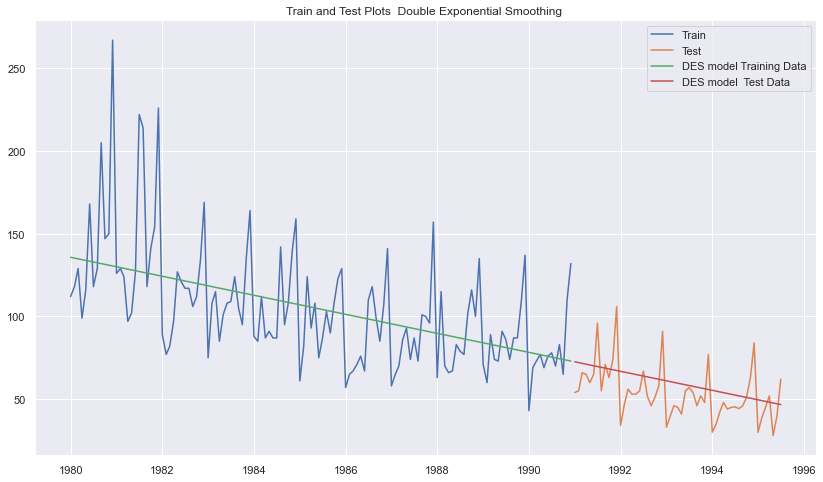

In [67]:

plt.figure(figsize=(14,8))
plt.plot(DES_train, label='Train')
plt.plot(DES_test, label='Test')

plt.plot(DES_train_predict, label='DES model Training Data')
plt.plot(DES_test_predict, label='DES model  Test Data')
plt.title('Train and Test Plots  Double Exponential Smoothing ')
plt.legend(loc='best');


In [68]:
rmse_model_test_des_autofit = np.sqrt(metrics.mean_squared_error(DES_test,DES_test_predict))
print(" Double Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f " 
      %(rmse_model_test_des_autofit))

 Double Exponential Smoothing Model forecast on the Test Data,  RMSE is 15.580 


In [69]:
resultsDf_DES = pd.DataFrame({'Test RMSE': [rmse_model_test_des_autofit]}
                           ,index=['Double Exponential Smoothing Optimized'])

resultsDf = pd.concat([resultsDf, resultsDf_DES])
resultsDf.iloc[-1,:]

Test RMSE    15.580105
Name: Double Exponential Smoothing Optimized, dtype: float64

In [70]:
resultsDf_DES_iter = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
                                
resultsDf_DES_iter

,Alpha Values,Beta Values,Test RMSE


In [71]:
for i in np.arange(0,1.05,0.05):
    for j in np.arange(0,1.05,0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test_rose))
        
        
        
        rmse_model6_test = np.sqrt(metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j]))
        
        
        resultsDf_DES_iter = resultsDf_DES_iter.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test}, ignore_index=True)
                                      

In [72]:
resultsDf_DES_iter.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Test RMSE
28,0.05,0.35,16.343344
27,0.05,0.30,18.640750
24,0.05,0.15,23.741250
22,0.05,0.05,31.555972
29,0.05,0.40,31.609086


In [73]:
resultsDf_DES_iter = resultsDf_DES_iter.sort_values(by=['Test RMSE'])
resultsDf_DES_iter.reset_index(drop =True, inplace =True)


In [74]:
DES_train['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]].head()

YearMonth
1980-01-01    118.000000
1980-02-01    123.595000
1980-03-01    129.112337
1980-04-01    134.901842
1980-05-01    138.273589
Name: (predict, 0.05, 0.35000000000000003), dtype: float64

In [75]:

DES_test['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]].head()

YearMonth
1991-01-01    73.523142
1991-02-01    73.078657
1991-03-01    72.634171
1991-04-01    72.189686
1991-05-01    71.745200
Name: (predict, 0.05, 0.35000000000000003), dtype: float64

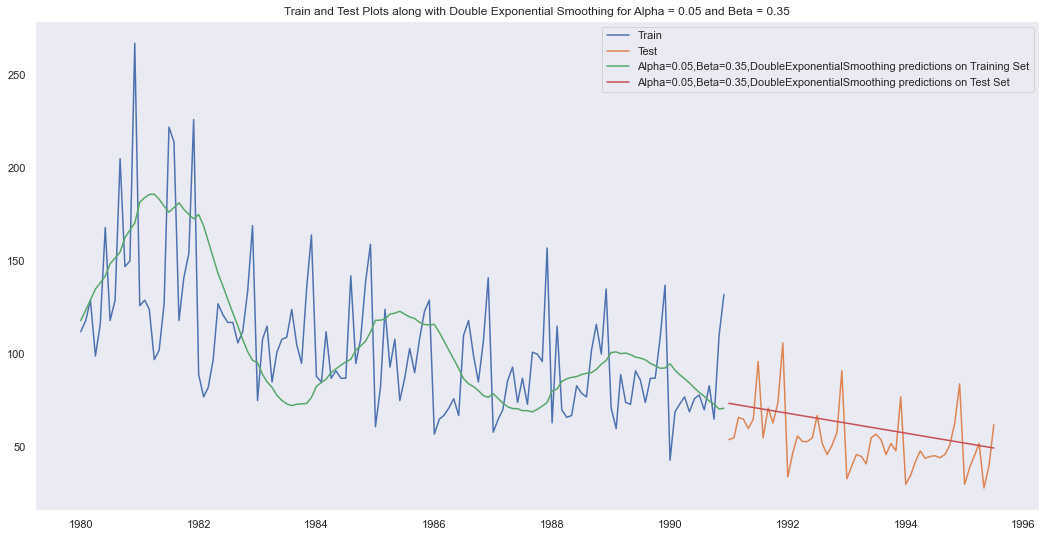

In [76]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]], 
         label='Alpha=0.05,Beta=0.35,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', resultsDf_DES_iter['Alpha Values'][0], resultsDf_DES_iter['Beta Values'][0]], 
         label='Alpha=0.05,Beta=0.35,DoubleExponentialSmoothing predictions on Test Set')
plt.title('Train and Test Plots along with Double Exponential Smoothing for Alpha = 0.05 and Beta = 0.35')

plt.legend(loc='best')
plt.grid();

In [77]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [resultsDf_DES_iter['Test RMSE'][0]]}
                           ,index=['Alpha=0.05, Beta=0.35, Double Exponential Smoothing Iterative'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[-1,:]

Test RMSE    16.343344
Name: Alpha=0.05, Beta=0.35, Double Exponential Smoothing Iterative, dtype: float64

In [78]:
TES_train = train_rose.copy()
TES_test = test_rose.copy()
TES_train = pd.DataFrame(TES_train)
TES_test = pd.DataFrame(TES_test)


In [79]:
model_TES= ExponentialSmoothing(TES_train['Rose'],trend='add',seasonal='multiplicative')

In [80]:
model_TES_autofit = model_TES.fit(optimized=True)

In [81]:
model_TES_autofit.params

{'smoothing_level': 0.06467234615091698,
 'smoothing_trend': 0.05315920636255018,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 50.880912909225756,
 'initial_trend': -0.31656840824205823,
 'initial_seasons': array([2.21583703, 2.51439498, 2.74693025, 2.40118428, 2.69936273,
        2.94338111, 3.2353888 , 3.44052906, 3.26420741, 3.19365239,
        3.72269442, 5.13435788]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose,auto_predict
YearMonth,,
1980-01-01,112.0,112.042347
1980-02-01,118.0,126.339483
1980-03-01,129.0,136.533254
1980-04-01,99.0,118.112130
1980-05-01,116.0,130.404942


In [83]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_rose))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,56.755640
1991-02-01,55.0,64.211013
1991-03-01,66.0,69.939833
1991-04-01,65.0,60.953618
1991-05-01,60.0,68.316934


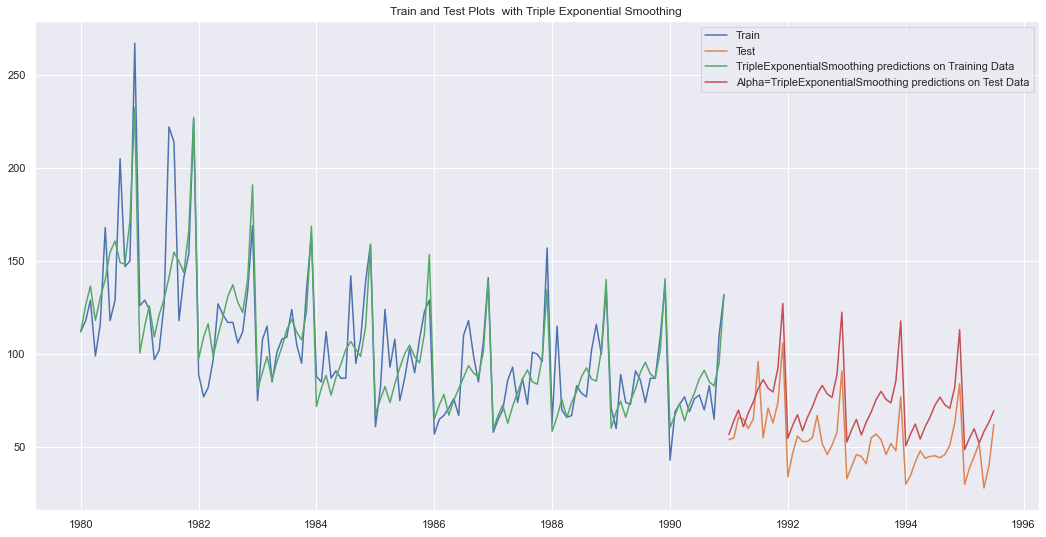

In [84]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='TripleExponentialSmoothing predictions on Training Data')
plt.plot(TES_test['auto_predict'], label='Alpha=TripleExponentialSmoothing predictions on Test Data')
plt.title('Train and Test Plots  with Triple Exponential Smoothing ')


plt.legend(loc='best');

In [85]:

rmse_model_test_TES_auto = np.sqrt(metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict']))
print(" Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %rmse_model_test_TES_auto)

 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 21.192


In [86]:
resultsDf_TES_iter = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
                                
resultsDf_TES_iter

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [87]:
for i in np.arange(0,1.05,0.05):
    for j in np.arange(0,1.05,0.05):
        for k in np.arange(0,1.05,0.05):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',round(i,2),round(j,2),round(k,2)] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',round(i,2),round(j,2),round(k,2)] = model_TES_alpha_i_j_k.forecast(steps=len(test_rose))
        
            
        
            rmse_model8_test = np.sqrt(metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',round(i,2),round(j,2),round(k,2)]))
            
        
            resultsDf_TES_iter = resultsDf_TES_iter.append({'Alpha Values':round(i,2),'Beta Values':round(j,2),
                                                            'Gamma Values':round(k,2), 'Test RMSE':rmse_model8_test}, ignore_index=True)
                                                           
                                      
                                     

In [88]:
resultsDf_TES_iter

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.0,0.0,0.00,145.040881
1,0.0,0.0,0.05,111.231554
2,0.0,0.0,0.10,87.914776
3,0.0,0.0,0.15,71.894202
4,0.0,0.0,0.20,60.909791
...,...,...,...,...
9256,1.0,1.0,0.80,9626.710708
9257,1.0,1.0,0.85,35513.537285
9258,1.0,1.0,0.90,9691.904468
9259,1.0,1.0,0.95,20404.803965


In [89]:
resultsDf_TES_iter.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Test RMSE
614,0.05,0.40,0.25,8.698606
613,0.05,0.40,0.20,8.717346
615,0.05,0.40,0.30,8.998488
597,0.05,0.35,0.45,9.038002
596,0.05,0.35,0.40,9.084235


In [90]:
resultsDf_TES_iter = resultsDf_TES_iter.sort_values(by=['Test RMSE'])
resultsDf_TES_iter.reset_index(drop =True, inplace =True)

In [91]:
TES_train['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0], resultsDf_TES_iter['Gamma Values'][0]].head()

YearMonth
1980-01-01    112.223277
1980-02-01    118.454009
1980-03-01    129.713612
1980-04-01     99.695115
1980-05-01    116.962331
Name: (predict, 0.05, 0.4, 0.25), dtype: float64

In [92]:
TES_test['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0], resultsDf_TES_iter['Gamma Values'][0]].head()

YearMonth
1991-01-01    47.801273
1991-02-01    60.529865
1991-03-01    63.818926
1991-04-01    60.238326
1991-05-01    60.805556
Name: (predict, 0.05, 0.4, 0.25), dtype: float64

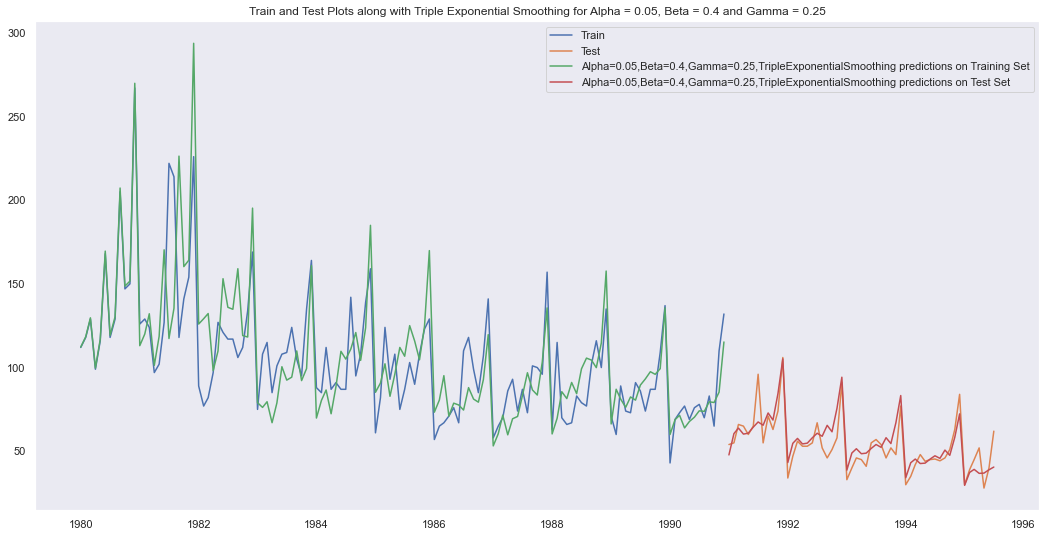

In [93]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0], resultsDf_TES_iter['Gamma Values'][0]], 
         label='Alpha=0.05,Beta=0.4,Gamma=0.25,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', resultsDf_TES_iter['Alpha Values'][0], resultsDf_TES_iter['Beta Values'][0],resultsDf_TES_iter['Gamma Values'][0]], 
         label='Alpha=0.05,Beta=0.4,Gamma=0.25,TripleExponentialSmoothing predictions on Test Set')
plt.title('Train and Test Plots along with Triple Exponential Smoothing for Alpha = 0.05, Beta = 0.4 and Gamma = 0.25')


plt.legend(loc='best')
plt.grid();

In [94]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [resultsDf_TES_iter['Test RMSE'][0]]}
                           ,index=['Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[-1,:]

Test RMSE    8.698606
Name: Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative, dtype: float64

In [95]:
resultsDf

,Test RMSE
Regression On Time,51.457439
Naive Model,79.745697
Simple Average Model,53.488233
"Alpha=0.0987, Simple Exponential Smoothing Optimized",36.824478
Double Exponential Smoothing Optimized,15.580105
"Alpha=0.05, Beta=0.35, Double Exponential Smoothing Iterative",16.343344
"Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative",8.698606


In [96]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    

    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()
    
  
    plt.figure(figsize =(20,8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    Overall_mean = plt.axhline(y=timeseries.mean(), color='green', label='Global Mean', linestyle='-')
    Overall_std = plt.axhline(y=timeseries.std(), color='yellow', label='Global Std', linestyle='-')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

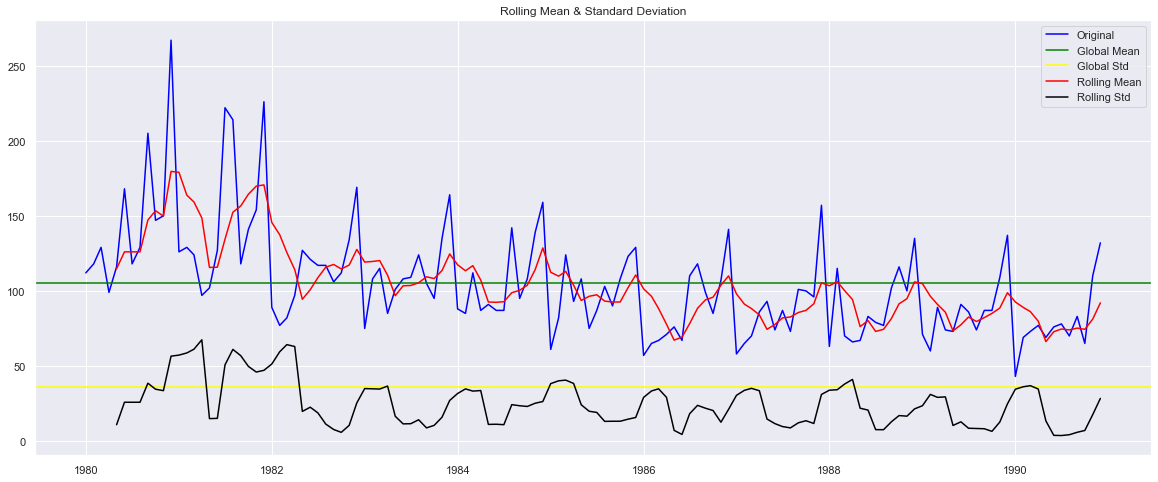

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [97]:
test_stationarity(train_rose)

In [98]:
train_rose_first_diff = train_rose.diff(1)

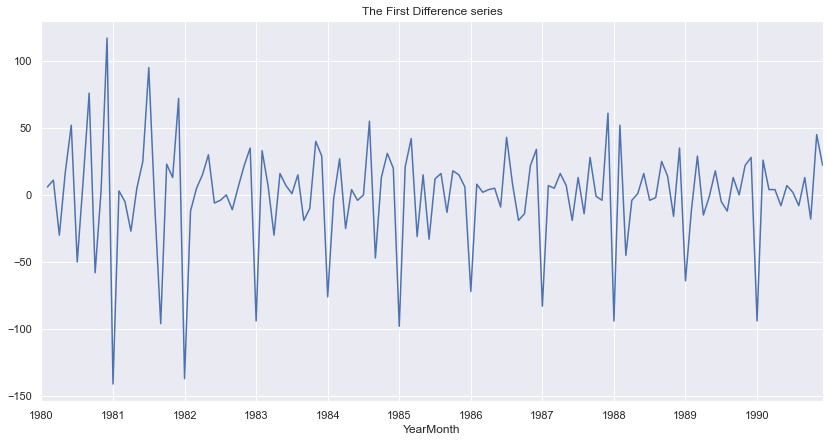

In [99]:
train_rose_first_diff.plot()
plt.title('The First Difference series');

In [100]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(train_rose_first_diff.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [101]:
# ARIMA MODEL

In [102]:
import itertools
p = range(0, 5)
q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)


In [103]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [104]:
for param in pdq:
    ARIMA_model = ARIMA(train_rose.values,order=param).fit()
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

In [105]:
ARIMA_AIC.sort_values(by='AIC',ascending=True, inplace =True)
ARIMA_AIC.reset_index(drop =True, inplace = True)
print('Total combinations run on the ARIMA model:', len(ARIMA_AIC))

ARIMA_AIC.head(10)

Total combinations run on the ARIMA model: 20


,param,AIC
0,"(3, 1, 3)",1273.194094
1,"(0, 1, 2)",1276.835372
2,"(1, 1, 2)",1277.359227
3,"(1, 1, 1)",1277.775756
4,"(0, 1, 3)",1278.074261
5,"(2, 1, 1)",1279.045689
6,"(2, 1, 2)",1279.298694
7,"(1, 1, 3)",1279.312633
8,"(3, 1, 1)",1279.605966
9,"(0, 1, 1)",1280.726183


In [106]:
mod = ARIMA(train_rose, order=ARIMA_AIC['param'][0], freq=train_rose.index.inferred_freq)

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sun, 25 Jul 2021   AIC                           1273.194
Time:                        21:52:58   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.406      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.33

In [107]:
predict_test = results_Arima.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [108]:
predict_test.head()

1991-01-01    74.746075
1991-02-01    75.537774
1991-03-01    81.707957
1991-04-01    59.779183
1991-05-01    70.362954
Freq: MS, dtype: float64

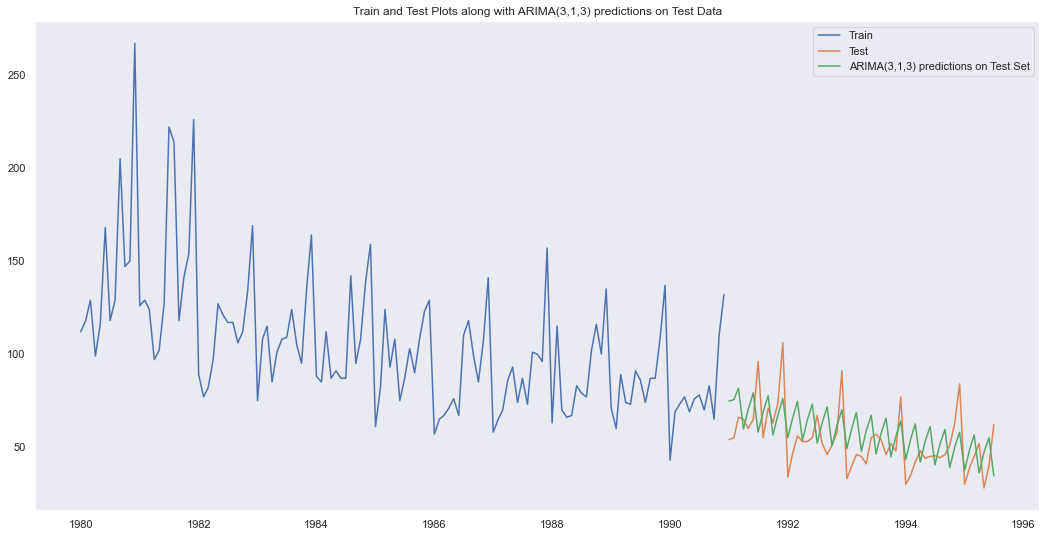

In [109]:
plt.figure(figsize=(18,9))
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predict_test, label='ARIMA(3,1,3) predictions on Test Set')
plt.title('Train and Test Plots along with ARIMA(3,1,3) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();

In [110]:
rmse = np.sqrt(mean_squared_error(test_rose,predict_test))
print("ARIMA(3,1,3) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

ARIMA(3,1,3) Model forecast on the Test Data,  RMSE is 15.998


In [111]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,3) Automated AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])

In [112]:
#SARIMA MODELS

In [113]:
p = range(0, 3)
q = range(0, 3)
d= range(1,2)
D = range(0,2)

pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [114]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [115]:
import  statsmodels.api as  sm

In [116]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_rose, freq=train_rose.index.inferred_freq,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.423082720736
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.437529638089
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.505730164378
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776143
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.020786938656
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635749872
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658809
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.337538360162
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654703
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697505
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945852
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374412
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729143929
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244226863
SARIMA(0, 1

In [117]:
SARIMA_AIC.sort_values(by='AIC',ascending=True, inplace =True)
SARIMA_AIC.reset_index(drop =True, inplace = True)
print('Total combinations run on the SARIMA model:', len(SARIMA_AIC))

SARIMA_AIC.head(10)

Total combinations run on the SARIMA model: 162


,param,seasonal,AIC
0,"(0, 1, 2)","(2, 1, 2, 12)",774.969120
1,"(1, 1, 2)","(2, 1, 2, 12)",776.940108
2,"(2, 1, 2)","(2, 1, 2, 12)",776.996101
3,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
4,"(2, 1, 2)","(2, 1, 1, 12)",783.703652
5,"(1, 1, 1)","(2, 1, 2, 12)",783.899095
6,"(0, 1, 2)","(0, 1, 2, 12)",784.014096
7,"(2, 1, 2)","(0, 1, 2, 12)",784.140979
8,"(2, 1, 1)","(2, 1, 1, 12)",784.892805
9,"(0, 1, 2)","(1, 1, 2, 12)",785.823714


In [118]:
mod = sm.tsa.statespace.SARIMAX(train_rose, freq=train_rose.index.inferred_freq,
                                order=SARIMA_AIC['param'][0],
                                seasonal_order=SARIMA_AIC['seasonal'][0],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 25 Jul 2021   AIC                            774.969
Time:                                    21:55:45   BIC                            792.622
Sample:                                01-01-1980   HQIC                           782.094
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.167      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

In [119]:
predict_test = results_SARIMA.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [120]:
predict_test.head()

1991-01-01    44.214993
1991-02-01    62.327011
1991-03-01    67.315130
1991-04-01    63.162186
1991-05-01    66.475687
Freq: MS, Name: predicted_mean, dtype: float64

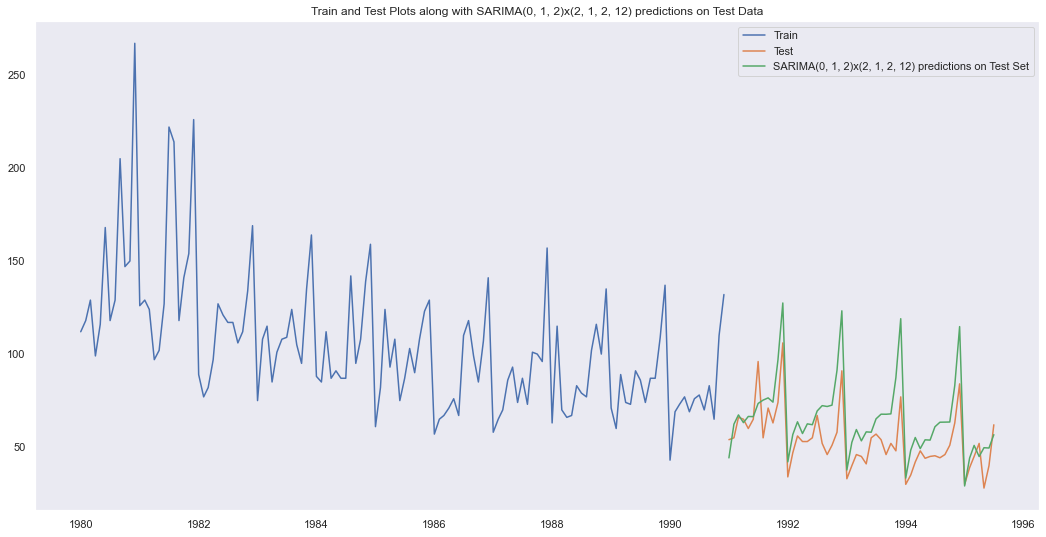

In [121]:

plt.figure(figsize=(18,9))
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predict_test, label='SARIMA(0, 1, 2)x(2, 1, 2, 12) predictions on Test Set')
plt.title('Train and Test Plots along with SARIMA(0, 1, 2)x(2, 1, 2, 12) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();

In [122]:
#MODEL EVALUATION

In [123]:
rmse = np.sqrt(mean_squared_error(test_rose,predict_test))
print("SARIMA(0, 1, 2)x(2, 1, 2, 12) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

SARIMA(0, 1, 2)x(2, 1, 2, 12) Model forecast on the Test Data,  RMSE is 16.529


In [124]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0, 1, 2)x(2, 1, 2, 12) Automated AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[[-2,-1],:]

,Test RMSE
"ARIMA(3,1,3) Automated AIC",15.997918
"SARIMA(0, 1, 2)x(2, 1, 2, 12) Automated AIC",16.528855


In [125]:
#SARIMA/SARIMA models based on the cut-off points of ACF and PACF:

In [126]:
print('The p value of the Dickey-Fuller Test on Train data:', adfuller(train_rose, autolag='AIC')[1])

The p value of the Dickey-Fuller Test on Train data: 0.2194756412907245


In [127]:
train_first_diff = train_rose.diff(1)

In [128]:
print('The p value of the Dickey-Fuller Test after First Differencing:', adfuller(train_first_diff.dropna(), autolag='AIC')[1])

The p value of the Dickey-Fuller Test after First Differencing: 7.061943750943704e-09


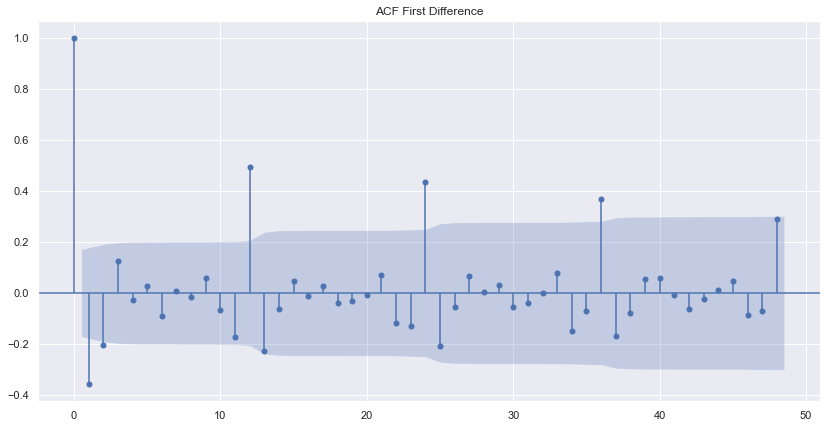

In [129]:
plot_acf(train_first_diff.dropna(),lags=48, alpha=0.05)
plt.title('ACF First Difference');

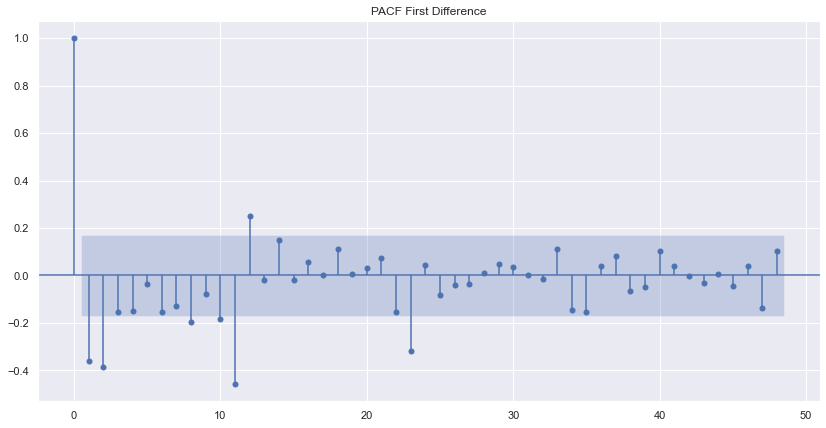

In [130]:
plot_pacf(train_first_diff.dropna(),lags=48, alpha=0.05)
plt.title('PACF First Difference');

In [131]:
#ARIMA MODE MANUAL

In [132]:
mod = ARIMA(train_rose, order=(2,1,2), freq=train_rose.index.inferred_freq)

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 25 Jul 2021   AIC                           1279.299
Time:                        21:55:47   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

In [133]:
predict_test = results_Arima.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [134]:
predict_test.head()

1991-01-01    79.421504
1991-02-01    69.465702
1991-03-01    71.723494
1991-04-01    69.773134
1991-05-01    69.995595
Freq: MS, dtype: float64

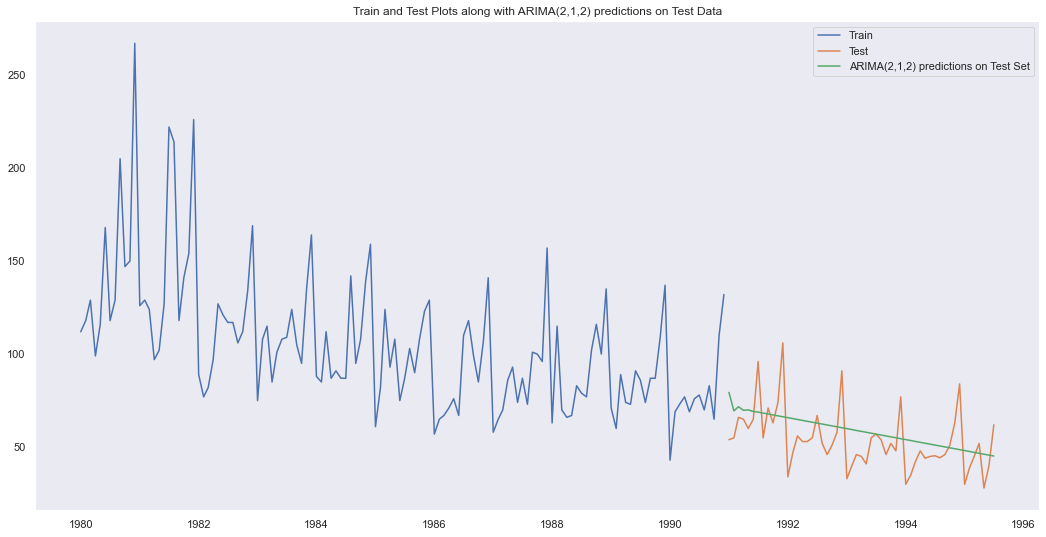

In [135]:
plt.figure(figsize=(18,9))
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predict_test, label='ARIMA(2,1,2) predictions on Test Set')
plt.title('Train and Test Plots along with ARIMA(2,1,2) predictions on Test Data')         
plt.legend(loc='best')
plt.grid();

In [136]:
rmse = np.sqrt(mean_squared_error(test_rose,predict_test))
print("ARIMA(2,1,2) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

ARIMA(2,1,2) Model forecast on the Test Data,  RMSE is 15.364


In [137]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2) ACF/PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])

In [138]:
train_first_diff = train_first_diff.dropna()
train_first_seasonal_diff = train_first_diff - train_first_diff.shift(12)

In [139]:
print('The p value of the Dickey-Fuller Test after First Differencing and First Seasonal Shift:',
      adfuller(train_first_seasonal_diff.dropna(), autolag='AIC')[1])

The p value of the Dickey-Fuller Test after First Differencing and First Seasonal Shift: 0.004222089763985825


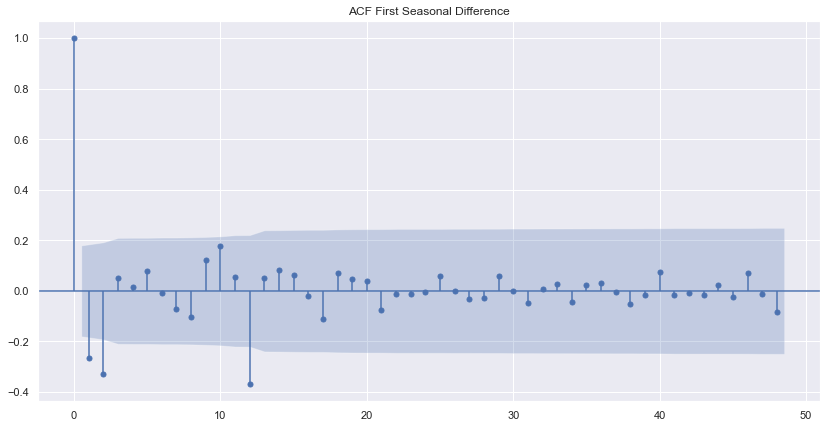

In [140]:
plot_acf(train_first_seasonal_diff.dropna(),lags=48, alpha=0.05)
plt.title('ACF First Seasonal Difference');

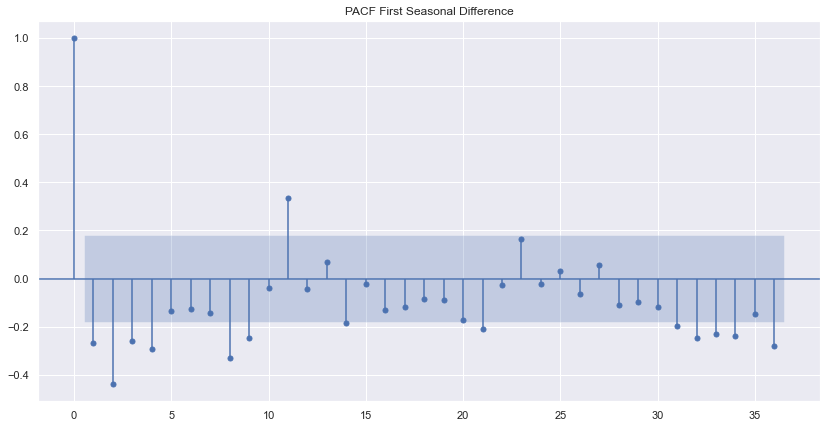

In [141]:
plot_pacf(train_first_seasonal_diff.dropna(),lags=36, alpha=0.05)
plt.title('PACF First Seasonal Difference');

In [142]:
#SARIMA MANUAL

In [143]:
mod = sm.tsa.statespace.SARIMAX(train_rose, freq=train_rose.index.inferred_freq,
                                order=(4,1,2),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -443.798
Date:                              Sun, 25 Jul 2021   AIC                            905.596
Time:                                      21:55:51   BIC                            929.308
Sample:                                  01-01-1980   HQIC                           915.200
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8065      0.131     -6.169      0.000      -1.063      -0.550
ar.L2          0.05

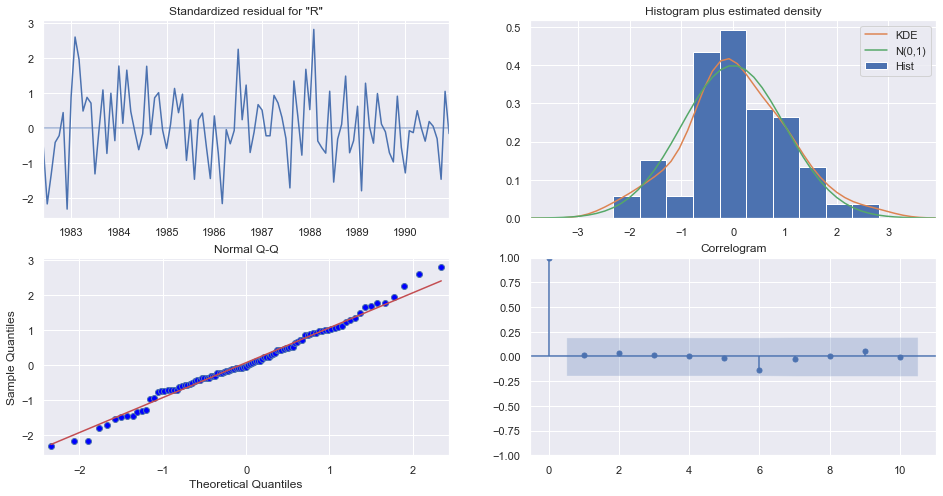

In [144]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))

plt.show()

In [145]:
predict_test = results_SARIMA.predict(start='1991-01-01',end='1995-07-01',typ='levels')

predict_test.head()

1991-01-01    47.771616
1991-02-01    59.656058
1991-03-01    68.181573
1991-04-01    70.478001
1991-05-01    60.799079
Freq: MS, Name: predicted_mean, dtype: float64

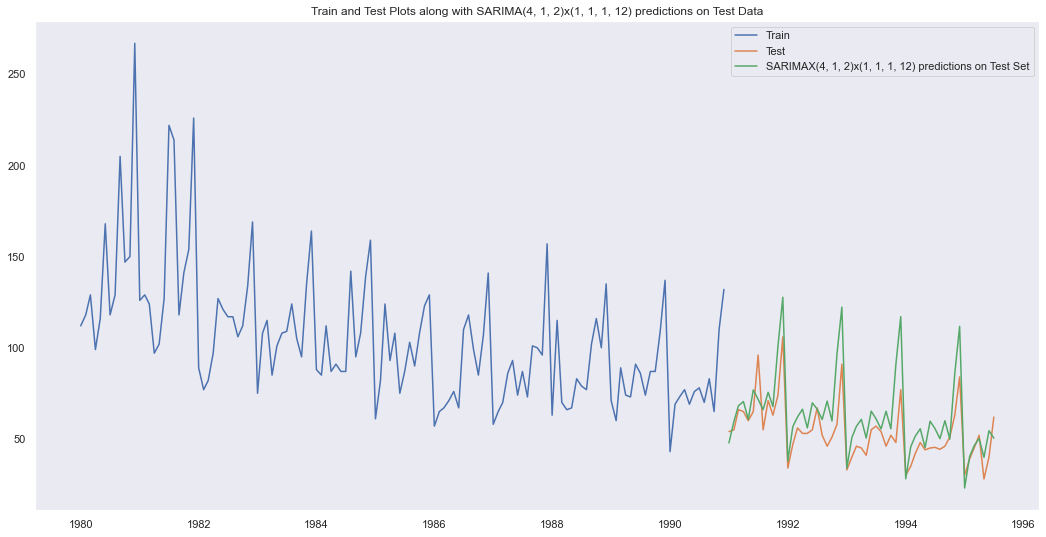

In [146]:
plt.figure(figsize=(18,9))
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predict_test, label='SARIMAX(4, 1, 2)x(1, 1, 1, 12) predictions on Test Set')
plt.title('Train and Test Plots along with SARIMA(4, 1, 2)x(1, 1, 1, 12) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();

In [147]:
rmse = np.sqrt(mean_squared_error(test_rose,predict_test))
print("SARIMA(4, 1, 2)x(1, 1, 1, 12) Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

SARIMA(4, 1, 2)x(1, 1, 1, 12) Model forecast on the Test Data,  RMSE is 15.465


In [148]:
resultsDf_iter = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4, 1, 2)x(1, 1, 1, 12) ACF/PACF'])

resultsDf = pd.concat([resultsDf, resultsDf_iter])
resultsDf.iloc[[-2,-1],:]

,Test RMSE
"ARIMA(2,1,2) ACF/PACF",15.363931
"SARIMA(4, 1, 2)x(1, 1, 1, 12) ACF/PACF",15.464686


In [149]:
resultsDf.sort_values(by = 'Test RMSE')

,Test RMSE
"Alpha=0.05,Beta=0.4,Gamma=0.25, Triple Exponential Smoothing Iterative",8.698606
"ARIMA(2,1,2) ACF/PACF",15.363931
"SARIMA(4, 1, 2)x(1, 1, 1, 12) ACF/PACF",15.464686
Double Exponential Smoothing Optimized,15.580105
"ARIMA(3,1,3) Automated AIC",15.997918
"Alpha=0.05, Beta=0.35, Double Exponential Smoothing Iterative",16.343344
"SARIMA(0, 1, 2)x(2, 1, 2, 12) Automated AIC",16.528855
"Alpha=0.0987, Simple Exponential Smoothing Optimized",36.824478
Regression On Time,51.457439
Simple Average Model,53.488233


In [150]:
#forecast
#Optimum Model

In [151]:
fullmodel = ExponentialSmoothing(rose,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.05,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.25)

In [152]:
prediction = fullmodel.forecast(steps=12)

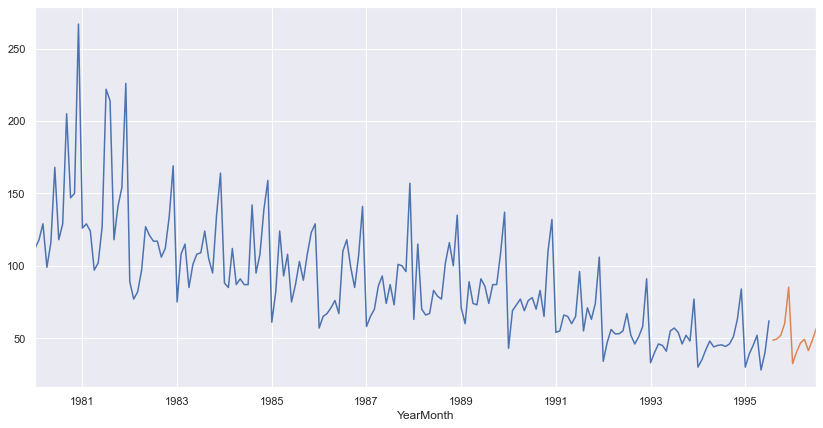

In [153]:
rose.plot()
prediction.plot();

In [154]:
pred_rose = pd.DataFrame({'lower_CI':prediction - ((np.percentile(prediction,[2.5,97.5])))[0],
                          'prediction':prediction,
                          'upper_ci': prediction + ((np.percentile(prediction,[2.5,97.5])))[1]})
pred_rose

,lower_CI,prediction,upper_ci
1995-08-01,14.001066,48.580956,126.924756
1995-09-01,14.892407,49.472297,127.816097
1995-10-01,17.353016,51.932905,130.276705
1995-11-01,25.644487,60.224377,138.568177
1995-12-01,50.636795,85.216685,163.560485
1996-01-01,-2.192582,32.387307,110.731107
1996-02-01,5.780444,40.360334,118.704134
1996-03-01,12.092063,46.671952,125.015752
1996-04-01,14.580107,49.159997,127.503797
1996-05-01,6.879452,41.459342,119.803142


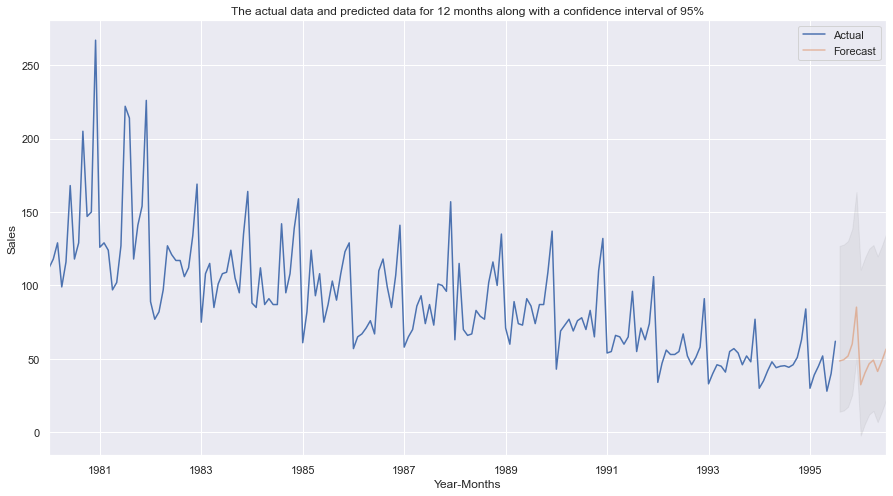

In [155]:
axis = rose.plot(label='Actual', figsize=(15,8))
pred_rose['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_rose.index, pred_rose['lower_CI'], pred_rose['upper_ci'], color='k', alpha=.05)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.title('The actual data and predicted data for 12 months along with a confidence interval of 95%')
plt.legend(loc='best')
plt.show()


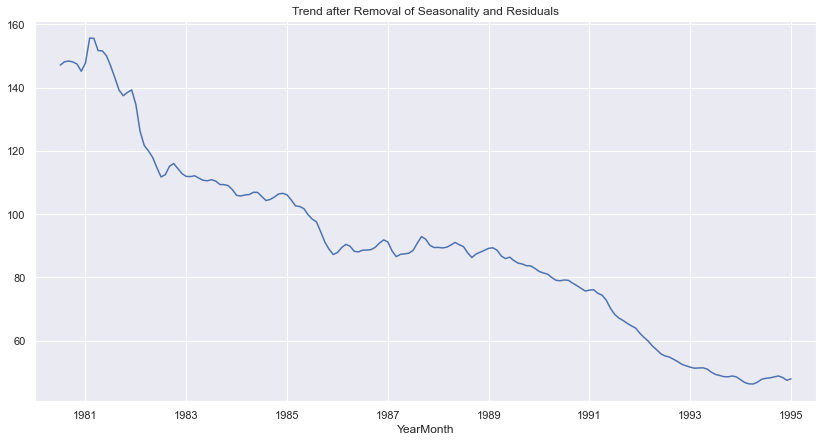

In [156]:
decomposition_mul.trend.plot()
plt.title('Trend after Removal of Seasonality and Residuals');

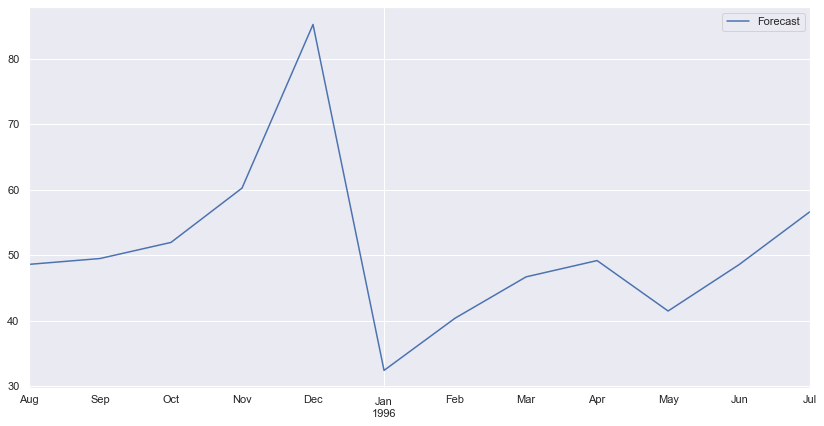

In [157]:

prediction.plot(label = 'Forecast');
plt.legend(loc='best')
plt.show()

In [158]:
prediction

1995-08-01    48.580956
1995-09-01    49.472297
1995-10-01    51.932905
1995-11-01    60.224377
1995-12-01    85.216685
1996-01-01    32.387307
1996-02-01    40.360334
1996-03-01    46.671952
1996-04-01    49.159997
1996-05-01    41.459342
1996-06-01    48.548310
1996-07-01    56.649409
Freq: MS, dtype: float64